<a href="https://colab.research.google.com/github/map72ru/python_data_lib/blob/main/NR_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [1]:
from google.colab import drive
drive.mount('/content/hw2')

Mounted at /content/hw2


In [2]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [3]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [ ]:
print(iris_data.head(100))

     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0     1            5.1           3.5            1.4           0.2        0
1     2            4.9           3.0            1.4           0.2        0
2     3            4.7           3.2            1.3           0.2        0
3     4            4.6           3.1            1.5           0.2        0
4     5            5.0           3.6            1.4           0.2        0
..  ...            ...           ...            ...           ...      ...
95   96            5.7           3.0            4.2           1.2        2
96   97            5.7           2.9            4.2           1.3        2
97   98            6.2           2.9            4.3           1.3        2
98   99            5.1           2.5            3.0           1.1        2
99  100            5.7           2.8            4.1           1.3        2

[100 rows x 6 columns]


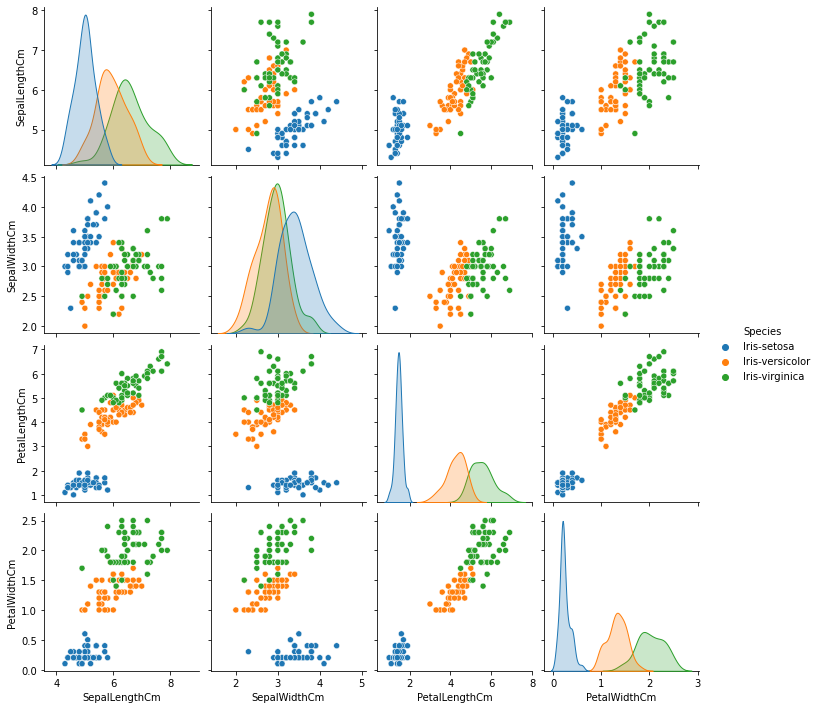

In [4]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("hw2/MyDrive/data/Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [66]:
def neuron_net(X_train, y_train, neuron_layer = 2, neuron_count = 5, leaning_rate = 0.05, n_cycles = 1000):
  
# присваевание случайных весов
  weights = []
  for l in range(neuron_layer):
    if l == 0:
      m = 4
      n = neuron_count
    elif l == neuron_layer-1:
      m = neuron_count
      n = 3
    else:
      m = neuron_count
      n = neuron_count

    weights.append(2*np.random.random((m, n)) - 1)

# массив для ошибок, чтобы потом построить график
  errors = []
  accurancy = 0
# процесс обучения
  for i in range(n_cycles):

    layers=[]
    # прямое распространение(feed forward)
    layers.append(X_train)

    for l in range(1, neuron_layer+1):
      layers.append(sigmoid(np.dot(layers[l-1], weights[l-1])))

    # обратное распространение(back propagation) с использованием градиентного спуска
    for l in range(neuron_layer, 0, -1):
      if l == neuron_layer:
        layer_error = y_train - layers[l] # производная функции потерь = производная квадратичных потерь 
      else:
        layer_error = layer_delta.dot(weights[l].T)

      layer_delta = layer_error * sigmoid_deriv(layers[l])
      d = layers[l-1].T.dot(layer_delta) * leaning_rate
      weights[l-1] += d
      layer_prev = layers[l]
      if l == neuron_layer:
      # метрика модели
        error = np.mean(np.abs(layer_error))
        errors.append(error)
        accuracy = (1 - error) * 100

  return weights, errors, accuracy

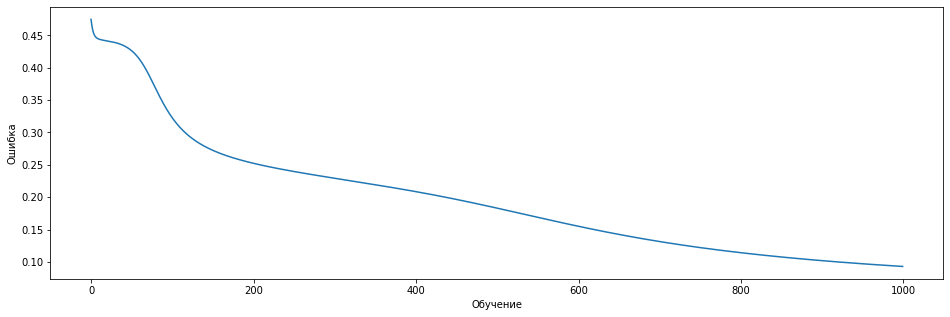

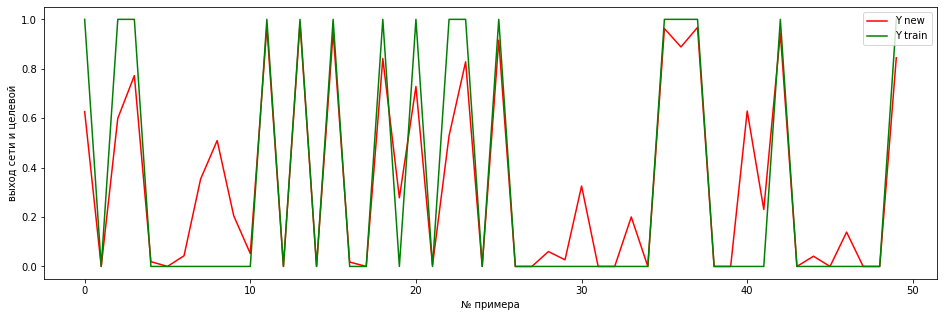

Аккуратность нейронной сети 87.69%


In [67]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5

weight, erros, accuracy = neuron_net(X_train, y_train, 2, 5, 0.05, 1000)
# присваевание случайных весов

### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")



In [70]:
def neuron_predict(X_test, y_test, weights):
  
  layer_prev = X_test
  for l in range(len(weights)):
    layer = sigmoid(np.dot(layer_prev, weights[l]))
    layer_prev = layer

  errors =  y_test - layer_prev
  error_t = np.mean(np.abs(errors))

  return (1 - error_t) * 100, layer_prev

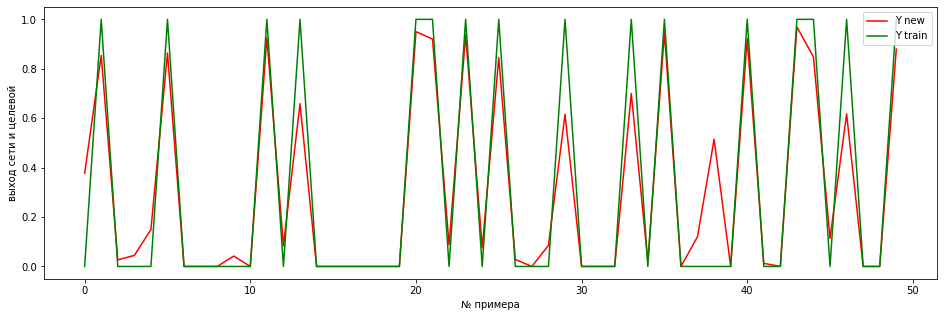

Аккуратность нейронной сети на тесте 88.58%


In [72]:
# прямое распространение(feed forward)
accuracy_t, layer2_t = neuron_predict(X_test, y_test, weight)
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

In [74]:
accuracies = []
accuracies_t = []
for l in range(2, 5):
  weight, erros, accuracy = neuron_net(X_train, y_train, l, 5, 0.05, 1000)
  accuracies.append(accuracy)
  accuracy_t, layer2_t = neuron_predict(X_test, y_test, weight)
  accuracies_t.append(accuracy_t)

In [76]:
accuracies

[89.58475151821928, 93.02876577970656, 91.89936607378552]

<BarContainer object of 3 artists>

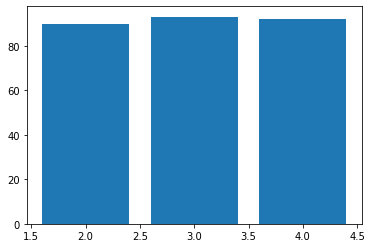

In [81]:
plt.bar([2,3,4], accuracies)

<BarContainer object of 3 artists>

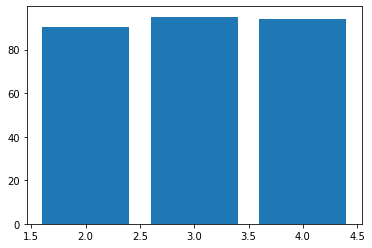

In [83]:
plt.bar([2,3,4], accuracies_t)

Разумное увеличение количества слоев может улучшать точность

In [84]:
accuracies = []
accuracies_t = []
for l in range(4, 10):
  weight, erros, accuracy = neuron_net(X_train, y_train, 4, l, 0.05, 1000)
  accuracies.append(accuracy)
  accuracy_t, layer2_t = neuron_predict(X_test, y_test, weight)
  accuracies_t.append(accuracy_t)

<BarContainer object of 6 artists>

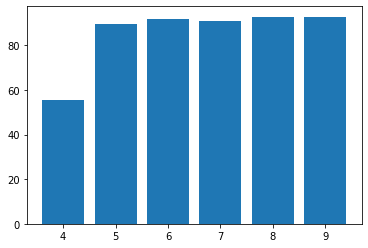

In [85]:
plt.bar(range(4, 10), accuracies)

<BarContainer object of 6 artists>

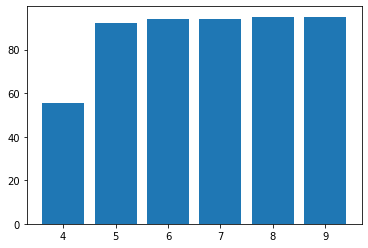

In [86]:
plt.bar(range(4, 10), accuracies_t)

Количество элементов в слое приводит к улучшению результата

In [88]:
accuracies = []
accuracies_t = []
for l in range(1, 11):
  weight, erros, accuracy = neuron_net(X_train, y_train, 4, 9, l/100, 1000)
  accuracies.append(accuracy)
  accuracy_t, layer2_t = neuron_predict(X_test, y_test, weight)
  accuracies_t.append(accuracy_t)

<BarContainer object of 10 artists>

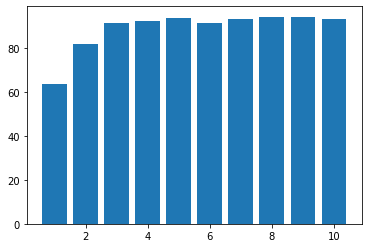

In [89]:
plt.bar(range(1, 11), accuracies)

<BarContainer object of 10 artists>

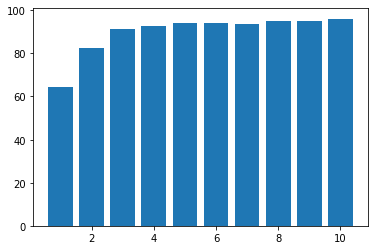

In [90]:
plt.bar(range(1, 11), accuracies_t)

In [ ]:
Увеличение шага обучения увеличивает точность

In [93]:
accuracies = []
accuracies_t = []
for l in range(500, 1600, 100):
  weight, erros, accuracy = neuron_net(X_train, y_train, 4, 9, 0.1, l)
  accuracies.append(accuracy)
  accuracy_t, layer2_t = neuron_predict(X_test, y_test, weight)
  accuracies_t.append(accuracy_t)

In [97]:
accuracies

[83.93403473684319,
 90.31613377726416,
 79.16207825522277,
 92.56612641528149,
 94.77161322654054,
 93.20530238761809,
 66.14804196646806,
 95.39804660887506,
 95.26609015276742,
 96.01856157383504,
 95.97461273132562]

<BarContainer object of 11 artists>

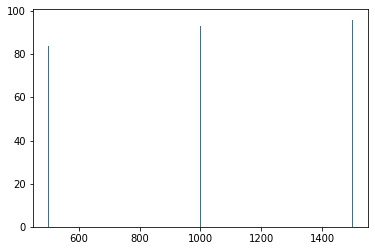

In [98]:
plt.bar(range(500, 1600, 100), accuracies)

In [99]:
accuracies_t

[76.2263199487762,
 89.6999376058002,
 78.42542314672637,
 91.92670802131249,
 96.48374503934689,
 95.89974329139228,
 65.89646691960621,
 96.62572985316973,
 96.01165469302806,
 97.07219666013991,
 96.91682682844436]

Странный провал на 1100 циклов. Видимо с таким количеством циклов градинет не попадает в минимум. Хотя странно...